In [1]:

# Imports
import pandas as pd
from pandas import DataFrame, Series
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import numpy as np
import json
import sklearn 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# note that here I used the mini corpus with 100,000 datapoints for computational reasons
clean_corpus = pd.read_csv('/home/theresa/Desktop/DataSets/clean_mini_corpus.csv')

In [3]:
# there may be some missing values in cleantext; drop those
clean_corpus.dropna(inplace = True)

In [4]:
clean_corpus.shape

(99969, 2)

In [5]:

# Split the data for training (90% of data) and testing (10% of data)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clean_corpus['CleanText'],
                                                    clean_corpus['Sentiment'],test_size=0.1)

In [6]:
print (X_train.shape, X_test.shape, Y_train.shape , Y_test.shape)

(89972,) (9997,) (89972,) (9997,)


In [7]:
# Create bag of words for training data

from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:

# Initialize the "TfidfVectorizer" object, which is sklearn's refined bag of words tool.  
# It first divides the number of occurrences of each word in a document by the total number of words in the document: 
# these new features are called tf for Term Frequencies.
# Another refinement on top of tf is to downscale weights for the less informative words that occur in the corpus
# than those that occur only in a smaller portion of the corpus.
# This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

vectorizer = TfidfVectorizer(analyzer = "word",tokenizer = None,preprocessor = None, stop_words = None,
                             max_features = 5000)

In [10]:

# fit_transform() does two functions: First, it fits the model and learns the vocabulary; second, it transforms our 
# training data into feature vectors. 

# The input to fit_transform should be a list of strings.
X_train_list = X_train.tolist()

# now we can use the fit_transform function
train_data_features = vectorizer.fit_transform(X_train_list)

# Numpy arrays are easy to work with, so convert the result to an array
train_data_features = train_data_features.toarray()

print ('train_data_features done')

train_data_features done


In [11]:

# Get a bag of words for the test set, and convert to a numpy array

X_test_list = X_test.tolist()

# VERY IMPORTANT: On test data, we ONLY use transform... we DO NOT FIT IT! 
test_data_features = vectorizer.transform(X_test_list)
test_data_features = test_data_features.toarray()

print ('test_data_features done')

test_data_features done


In [12]:
train_data_features.shape

(89972, 5000)

In [13]:
test_data_features.shape

(9997, 5000)

In [14]:
Y_test.mean() # null error rate

0.5043513053916174

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as features and the sentiment labels as the response 
# variable

# This may take a few minutes to run
# On my machine, it took more than an hour
forest = forest.fit( train_data_features, Y_train )

test_pred = forest.predict(test_data_features)

In [ ]:
train_score = forest.score(train_data_features, Y_train)
test_score = forest.score(test_data_features, Y_test)

print (train_score) 
print (test_score)  

In [15]:
# confusion matrix and a classification report

from sklearn import metrics
from sklearn.cross_validation import cross_val_score


/home/theresa/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:

print (metrics.confusion_matrix(Y_test, test_pred))
print (metrics.classification_report(Y_test, test_pred))

In [ ]:
#I'll save this random forest, just in case I want to play with it later
import pickle



file = open('random_forest_sentiment_mini_corpus.pickle.p', 'wb+')

pickle.dump( forest, file)
f.close()



Multinomial Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial NB classifier 
mnb = MultinomialNB() 

# Fit the MNB classifier to the training set, using the bag of words as features and the sentiment labels as the 
# response variable

# This may take a few minutes to run
#on my machine, it took only a couple of seconds!
mnb = mnb.fit( train_data_features, Y_train )

mnb_test_pred = mnb.predict(test_data_features)

In [41]:

# MNB test accuracy 

mnb_test_score = mnb.score(test_data_features, Y_test)

print (mnb_test_score)

0.746323897169


In [17]:

from sklearn import metrics
from sklearn.cross_validation import cross_val_score



/home/theresa/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
print (metrics.confusion_matrix(Y_test, mnb_test_pred))
print (metrics.classification_report(Y_test, mnb_test_pred))

[[3778 1177]
 [1359 3683]]
             precision    recall  f1-score   support

          0       0.74      0.76      0.75      4955
          1       0.76      0.73      0.74      5042

avg / total       0.75      0.75      0.75      9997



Support Vector Machine

In [16]:
from sklearn.linear_model import SGDClassifier

# Initialize a SVM classifier 
svm = SGDClassifier()

# Fit the SVM classifier to the training set, using the bag of words as features and the sentiment labels as the 
# response variable

# This may take even longer to run than the MNB 
# really, this didn't take long at all.  Now I'm curious as to why the random forest took so long...
svm = svm.fit( train_data_features, Y_train )

svm_test_pred = svm.predict(test_data_features)

In [17]:
# SVM test accuracy 

svm_test_score = svm.score(test_data_features, Y_test)

print (svm_test_score)

0.753926177853


In [18]:

print (metrics.confusion_matrix(Y_test, svm_test_pred))
print (metrics.classification_report(Y_test, svm_test_pred))

[[3457 1498]
 [ 962 4080]]
             precision    recall  f1-score   support

          0       0.78      0.70      0.74      4955
          1       0.73      0.81      0.77      5042

avg / total       0.76      0.75      0.75      9997



Sentiment analysis of Kentucky Derby tweets using SVM:

In [19]:

clean_tweets = pd.read_csv('/home/theresa/derby_cleantext.csv') 
clean_tweets.columns

Index(['created_at', 'CleanText'], dtype='object')

In [20]:
clean_tweets = clean_tweets.drop('created_at', axis=1);

In [21]:
# there may be some missing values in some of the entries, so drop the entries 
clean_tweets.dropna(inplace = True)

In [22]:
# The input to transform should be a list of strings.
derby_list = clean_tweets['CleanText'].values.tolist()

In [23]:
derby_list[0:5]

['tv today pm et nbc sn nhl nyr ottawa tied pm et nbc kentucky derby pm et abc nba warriors jazz warriors',
 'good morning happy rd running kentucky derby presented yum brands enjoy day go baby go',
 'abrlive definitive story one eyed kentuckyderby contender bh ahughes feature patch bloodhorse co viyz ihh',
 'co vnwkzynzcw co trnv yk l',
 'bloodhorse happy derby day co kv eospbs']

In [24]:

# get the bag of words on the rockets tweets
derby_data_features = vectorizer.transform(derby_list)

In [25]:

derby_data_features.shape

(122016, 5000)

In [29]:
derby_data_features = derby_data_features.toarray() 

In [28]:
# now run the SVM model to predict sentiment values for the derby

svm_derby_pred = svm.predict(derby_data_features)

In [30]:
svm_derby_pred[0:5]

array([1, 1, 1, 1, 1])

In [31]:
clean_tweets['Sentiment'] = svm_derby_pred

In [32]:
clean_tweets[0:15]

,CleanText,Sentiment
0,tv today pm et nbc sn nhl nyr ottawa tied pm e...,1
1,good morning happy rd running kentucky derby p...,1
2,abrlive definitive story one eyed kentuckyderb...,1
3,co vnwkzynzcw co trnv yk l,1
4,bloodhorse happy derby day co kv eospbs,1
5,blackmilk x coming final furlong gonna crowed ...,0
6,azikwinana worth come derby go selborne queens,1
7,football italia derby guide derby della mole c...,1
8,one eyed derby horse jillzarin dottieherman sh...,1
9,derby day check horse related books co chpjf k...,1


In [33]:
pos = clean_tweets[clean_tweets['Sentiment'] == 1]

In [37]:
pos.shape


(100130, 2)

In [35]:
neg = clean_tweets[clean_tweets['Sentiment'] == 0]


In [36]:
neg.shape

(21886, 2)

In [ ]:
clean_tweets.to_csv('derbyCorpus_sentiment.csv',index = False)

In [38]:
clean_tweets['Sentiment Category'] = clean_tweets.Sentiment.map({0: "Negative", 1: "Positive"})

In [39]:
clean_tweets.head()

,CleanText,Sentiment,Sentiment Category
0,tv today pm et nbc sn nhl nyr ottawa tied pm e...,1,Positive
1,good morning happy rd running kentucky derby p...,1,Positive
2,abrlive definitive story one eyed kentuckyderb...,1,Positive
3,co vnwkzynzcw co trnv yk l,1,Positive
4,bloodhorse happy derby day co kv eospbs,1,Positive


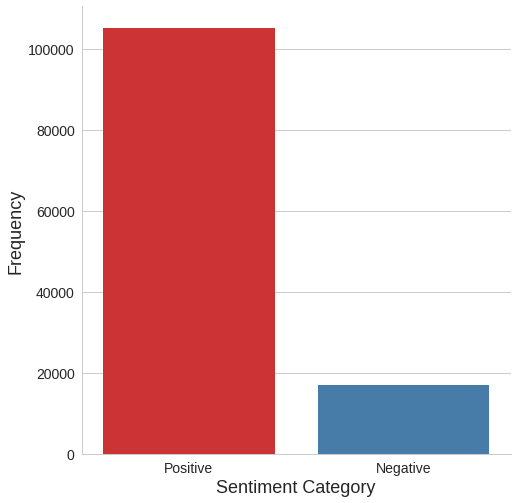

In [59]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets,palette='Set1', size = 7, aspect = 1, kind="count")

plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

Sentiment Analysis using Textblob
Textblob is built on top of NLTK and Pattern libraries. It is trained on a lexicon of adjectives that occur 
frequently in product reviews. For any string of text, it returns a sentiment polarity score (-1.0 to 1.0, 
negative to positive).

In [44]:
from textblob import TextBlob, Word


In [45]:
sentiments = [TextBlob(tweet).sentiment.polarity for tweet in clean_tweets['CleanText']]


In [62]:
print (clean_tweets['CleanText'][0:15], sentiments[0:15])

0     tv today pm et nbc sn nhl nyr ottawa tied pm e...
1     good morning happy rd running kentucky derby p...
2     abrlive definitive story one eyed kentuckyderb...
3                            co vnwkzynzcw co trnv yk l
4               bloodhorse happy derby day co kv eospbs
5     blackmilk x coming final furlong gonna crowed ...
6        azikwinana worth come derby go selborne queens
7     football italia derby guide derby della mole c...
8     one eyed derby horse jillzarin dottieherman sh...
9     derby day check horse related books co chpjf k...
10    honor kentucky derby equestrian properties saf...
11    derby dell enza parma reggiana co psgqsdjgji c...
12    years ago day two handicapping derby probably ...
13    josephirace good luck ournjhorses jockey rajiv...
14    kentucky derby saturday odds last minute tips ...
Name: CleanText, dtype: object [0.0, 0.6333333333333333, 0.0, 0.0, 0.8, 0.0, 0.3, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.27878787878787875, 0.0]


In [63]:

avg_sentiment = np.sum(sentiments)/len(sentiments)
print (avg_sentiment)

0.159971260261


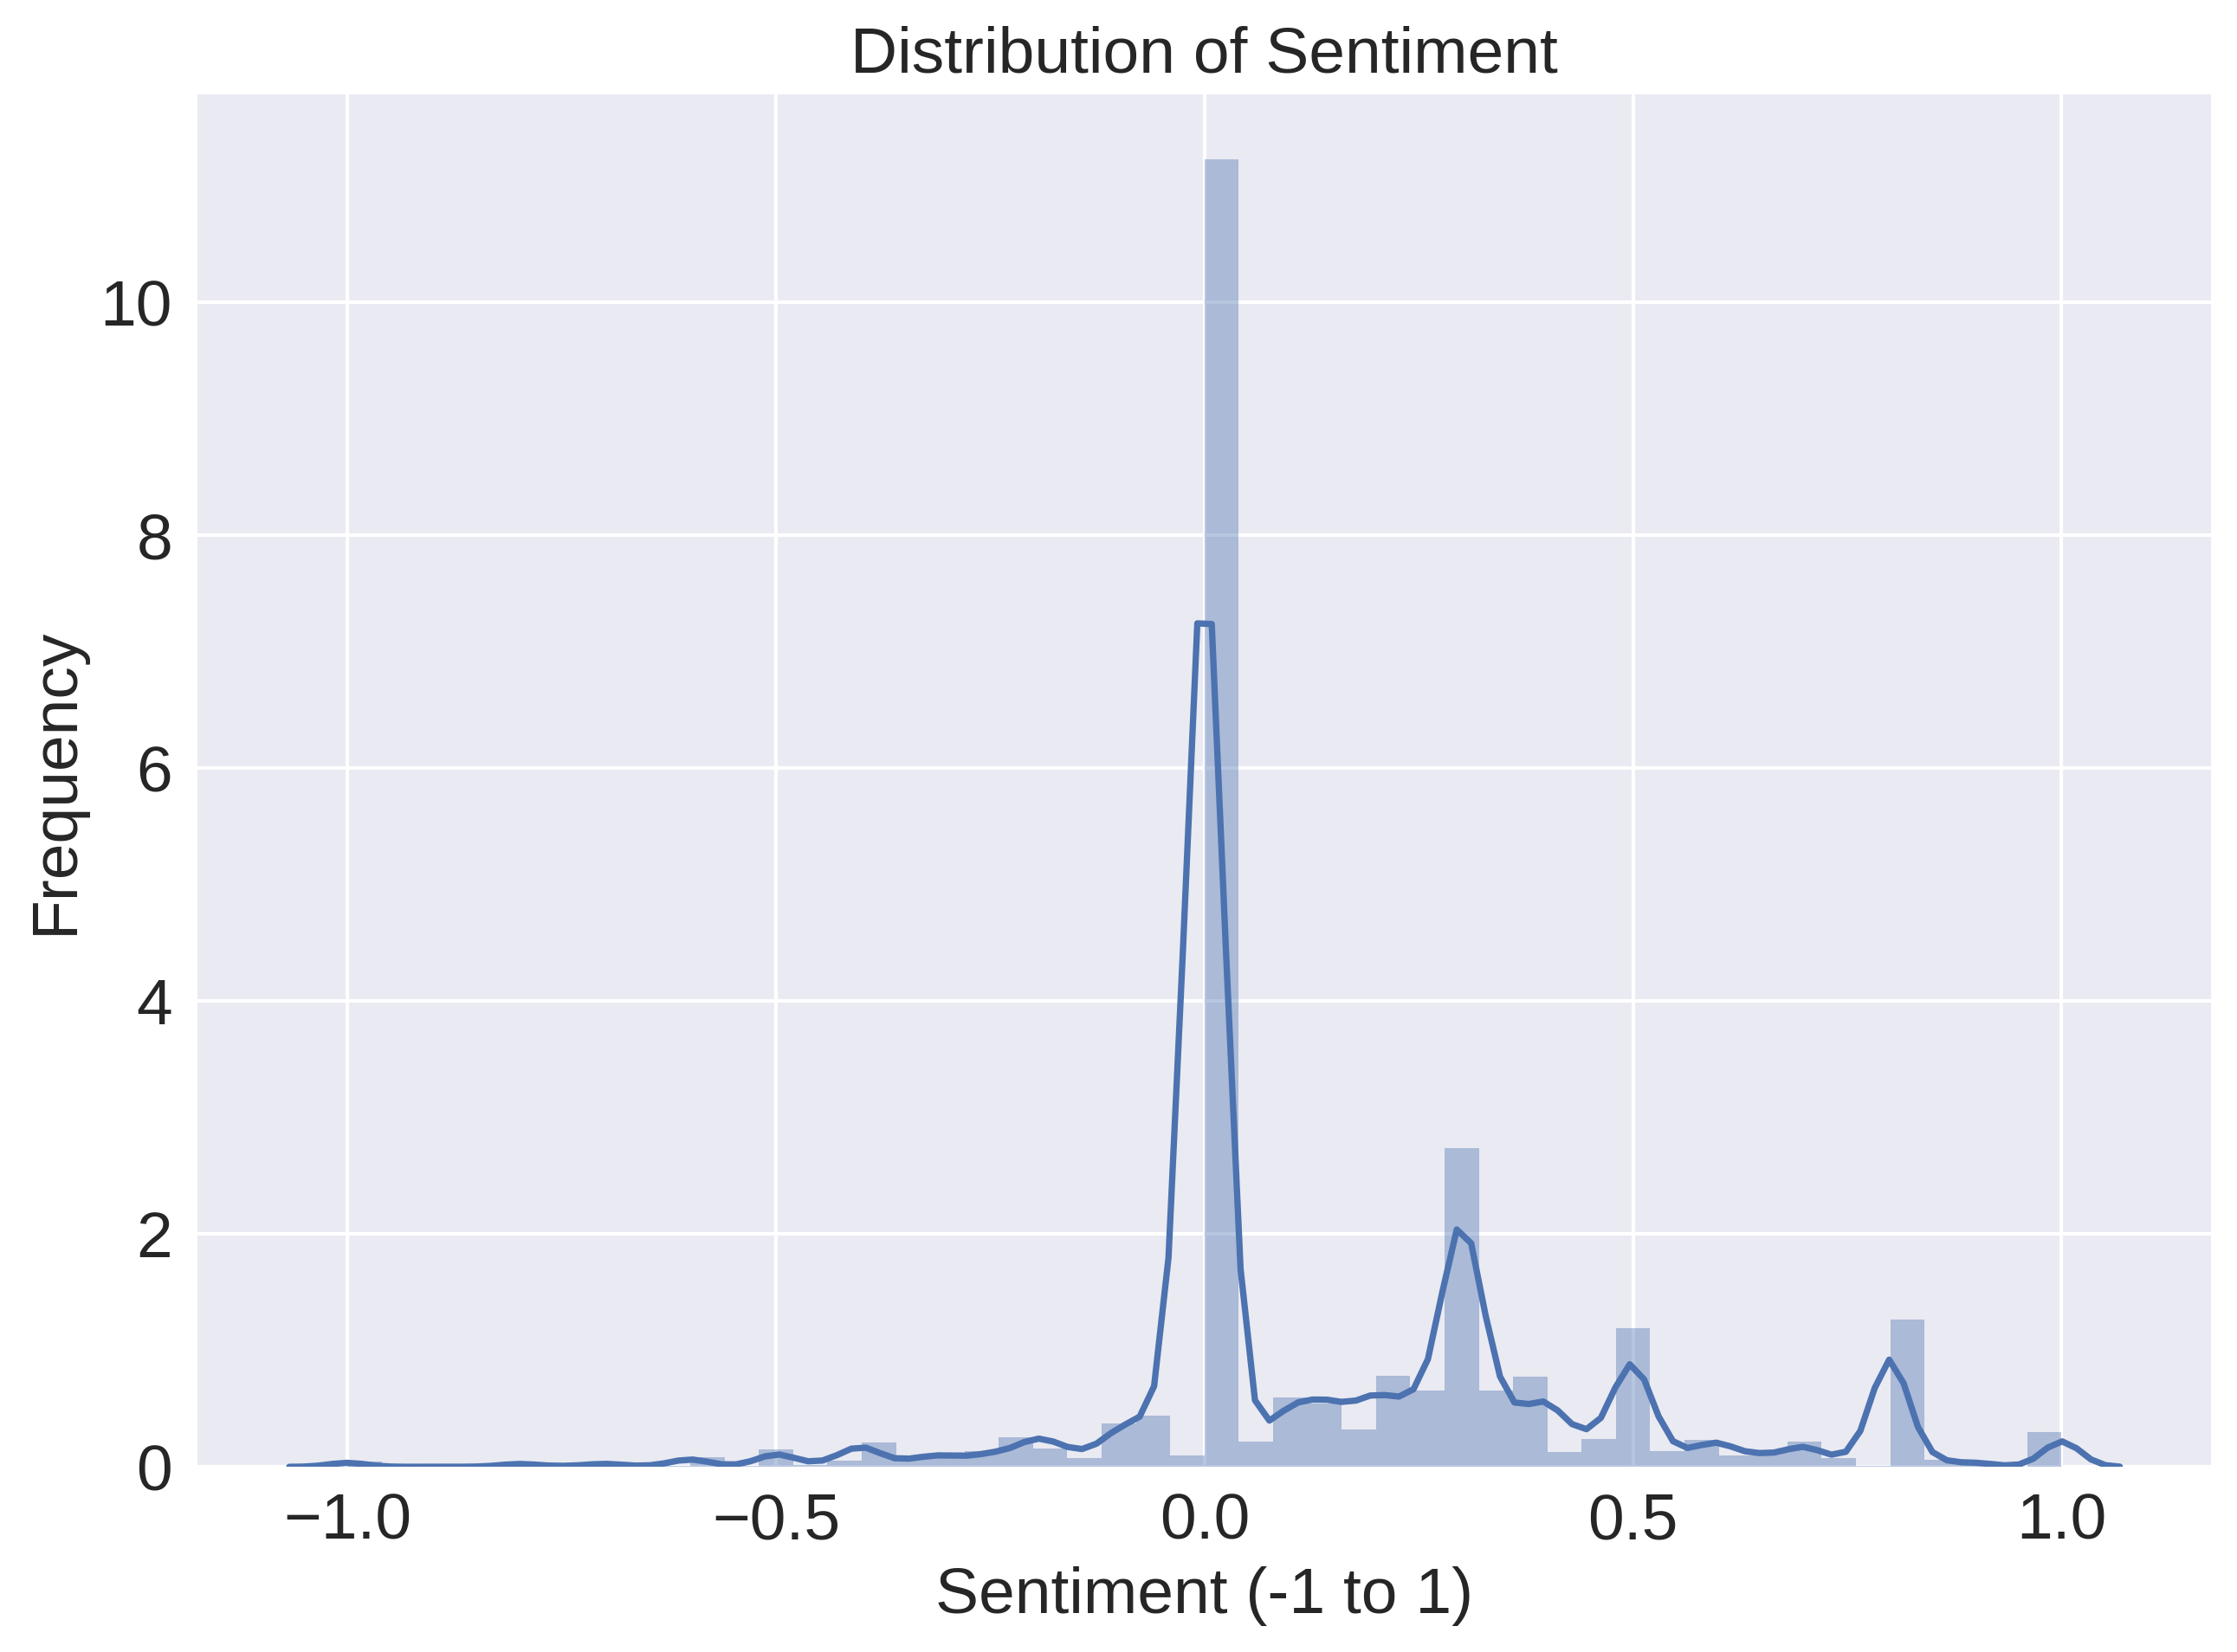

In [64]:
sns.set_style('darkgrid')
plt.figure(num=None, figsize=(10, 7), dpi=300)
ax = plt.subplot()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
sns.distplot(sentiments)
plt.title('Distribution of Sentiment', fontsize = 18)
plt.xlabel('Sentiment (-1 to 1)')
plt.ylabel('Frequency')
plt.show()

In [65]:

# Loop through all of the sentiments and put them into the appropriate group
pos_neg_neutral = []
for sentiment in sentiments:
    if sentiment <= -0.25:
        pos_neg_neutral.append('Negative')
    elif sentiment >= 0.25:
        pos_neg_neutral.append('Positive')
    elif sentiment > -0.25 and sentiment < 0.25:
        pos_neg_neutral.append('Neutral')
clean_tweets['Sentiment Category'] = np.array(pos_neg_neutral)

In [66]:
clean_tweets[0:5]

,CleanText,Sentiment,Sentiment Category
0,tv today pm et nbc sn nhl nyr ottawa tied pm e...,1,Neutral
1,good morning happy rd running kentucky derby p...,1,Positive
2,abrlive definitive story one eyed kentuckyderb...,1,Neutral
3,co vnwkzynzcw co trnv yk l,1,Neutral
4,bloodhorse happy derby day co kv eospbs,1,Positive


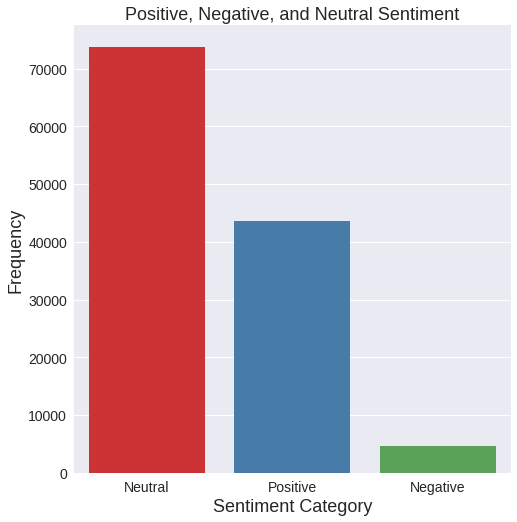

In [68]:
sns.set_style('darkgrid')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
sns.factorplot('Sentiment Category',data=clean_tweets, size = 7, aspect = 1, palette = 'Set1', kind='count')
plt.title('Positive, Negative, and Neutral Sentiment', fontsize = 18)
plt.xlabel('Sentiment Category', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

In [46]:

clean_tweets['Sentiment'] = sentiments

In [47]:
clean_tweets.head()

,CleanText,Sentiment,Sentiment Category
0,tv today pm et nbc sn nhl nyr ottawa tied pm e...,0.000000,Positive
1,good morning happy rd running kentucky derby p...,0.633333,Positive
2,abrlive definitive story one eyed kentuckyderb...,0.000000,Positive
3,co vnwkzynzcw co trnv yk l,0.000000,Positive
4,bloodhorse happy derby day co kv eospbs,0.800000,Positive


In [48]:
clean_tweets.to_csv('derby_sentiment_polarity.csv',index = False)